In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_theme()

# Data Loading

### Beer Advocate

In [2]:
df_ba_beers     = pd.read_csv('data/beer_advocate/beers.csv')
df_ba_breweries = pd.read_csv('data/beer_advocate/breweries.csv')
df_ba_users     = pd.read_csv('data/beer_advocate/users.csv')
df_ba_ratings   = pd.read_csv('data/beer_advocate/ratings.csv')

### Rate Beer

In [ ]:
df_rb_beers     = pd.read_csv('data/rate_beer/beers.csv')
df_rb_breweries = pd.read_csv('data/rate_beer/breweries.csv')
df_rb_users     = pd.read_csv('data/rate_beer/users.csv')
df_rb_ratings   = pd.read_csv('data/rate_beer/ratings.csv')

### Matched Beer Data

In [ ]:
df_ma_beers        = pd.read_csv('data/matched_beer_data/beers.csv',        header=[0, 1])
df_ma_breweries    = pd.read_csv('data/matched_beer_data/breweries.csv',    header=[0, 1])
df_ma_ratings      = pd.read_csv('data/matched_beer_data/ratings.csv',      header=[0, 1])
df_ma_users        = pd.read_csv('data/matched_beer_data/users.csv',        header=[0, 1])
df_ma_users_approx = pd.read_csv('data/matched_beer_data/users_approx.csv', header=[0, 1])

# Data Exploration

## Beers

In [3]:
print(f'[BeerAdovcate] Dataset contains data about {df_ba_beers.shape[0]} beers')
df_ba_beers.head(5)

[BeerAdovcate] Dataset contains data about 280823 beers


,beer_id,brewery_id,beer_name,beer_style,ratings_count,reviews_count,ratings_average,ratings_ba_score,ratings_bros_score,beer_alcohol_by_volume,ratings_average_computed,zscore,matching_ratings_count,matching_ratings_average,beer_global_style
0,166064,39912,Nashe Moskovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Pale Lager
1,166065,39912,Nashe Pivovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Pale Lager
2,166066,39912,Nashe Shakhterskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Pale Lager
3,166067,39912,Nashe Zhigulevskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Pale Lager
4,166063,39912,Zhivoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Pale Lager


### Breweries

[BeerAdvocate] Quartiles of the number of beers per brewery : [ 3.  8. 20.]


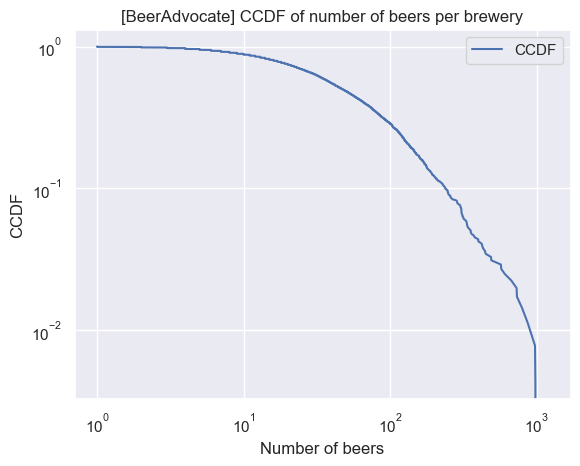

In [4]:
df_beers_by_brewery = df_ba_beers.groupby('brewery_id').size().reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=True)
df_beers_by_brewery['CCDF'] = 1 - df_beers_by_brewery['count'].cumsum(0) / df_beers_by_brewery['count'].sum()
df_beers_by_brewery.plot(
    x='count', y='CCDF', 
    logx=True, logy=True, 
    title='[BeerAdvocate] CCDF of number of beers per brewery',
    xlabel='Number of beers', 
    ylabel='CCDF',
)
print(f'[BeerAdvocate] Quartiles of the number of beers per brewery : {df_beers_by_brewery['count'].quantile([0.25, 0.5, 0.75]).values}')

Graphic interpetation: 

First, this graphic represents the probability for a brewery to have more than a number of beers given in the $x$-axis.

Second, 

Plus de 10% de breweries produisent 100 bieres ou +


<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Beer Style

In [5]:
print(f'[BeerAdvocate] Dataset contains data about {df_ba_beers['beer_style'].nunique()} styles of beer')

[BeerAdvocate] Dataset contains data about 104 styles of beer


During pre-processing, we grouped several beer styles together into broader categories based on those proposed on the BeerAdvocate website, to create a taxonomy that was easier to analyze.

<Axes: title={'center': '[BeerAdvocate] Number of beers per global style'}, xlabel='Beer style', ylabel='Number of beers'>

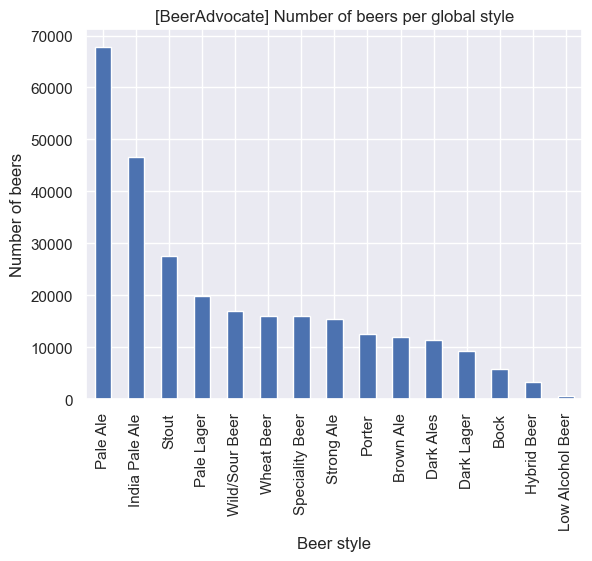

In [6]:
df_ba_beers.groupby('beer_global_style').size().sort_values(ascending=False).plot(
    kind='bar',
    title='[BeerAdvocate] Number of beers per global style',
    xlabel='Beer style',
    ylabel='Number of beers',
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Number of ratings

[BeerAdvocate] 11.69% (32841) of beers have no ratings
[BeerAdvocate] Quartiles of the number of ratings per beer : [1. 2. 8.]


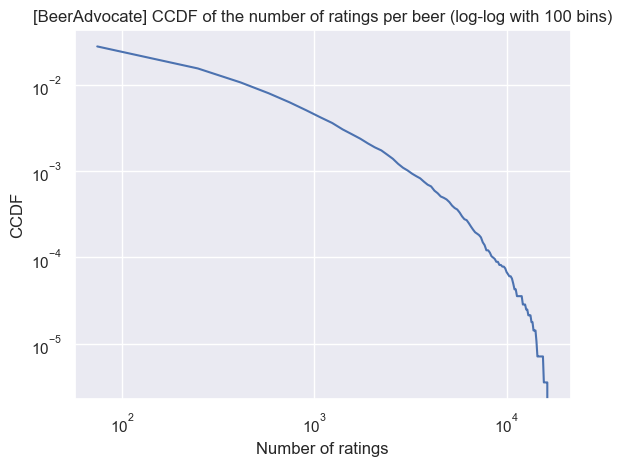

In [7]:
bin_counts = pd.cut(df_ba_beers['ratings_count'], 100).value_counts().sort_index()
ratings_per_beer_CCDF = 1 - bin_counts.cumsum(0) / bin_counts.sum()

sns.lineplot(
    x=[interval.mid for interval in bin_counts.index],
    y=ratings_per_beer_CCDF
)
plt.title('[BeerAdvocate] CCDF of the number of ratings per beer (log-log with 100 bins)')
plt.xlabel('Number of ratings')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')

print(f'[BeerAdvocate] {(df_ba_beers['ratings_count'] == 0).mean() * 100:.2f}% ({(df_ba_beers['ratings_count'] == 0).sum()}) of beers have no ratings')
print(f'[BeerAdvocate] Quartiles of the number of ratings per beer : {df_ba_beers['ratings_count'].quantile([0.25, 0.5, 0.75]).values}')

Only (a bit more than) $10\%$ of beers have at least $100$ ratings, showing that we will have to be careful making our analysis.

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Average rating

Text(0, 0.5, 'Average rating (/5)')

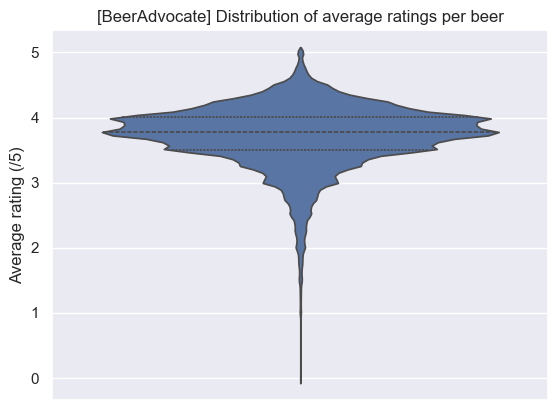

In [9]:
sns.violinplot(df_ba_beers['ratings_average'], inner='quart')
plt.title('[BeerAdvocate] Distribution of average ratings per beer')
plt.ylabel('Average rating (/5)')

*Interpretation*: 

We observe that most of beers have a rating between $3.5/5$ and $4/5$, with a mean of $3.75/5$. This could give us a first glimpse of the user's notation: they are gracious. For example, a not liked beer has a rating around $2$.

Text(0.5, 0, 'Average rating (/5)')

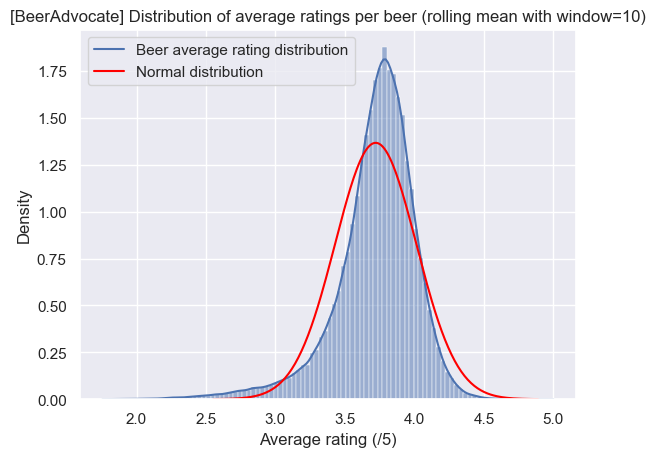

In [9]:
ratings_average_rolling = df_ba_beers[df_ba_beers['ratings_average'].notna()]['ratings_average'].rolling(10).mean()[9:]
sns.histplot(ratings_average_rolling, bins=100, kde=True, stat="density")


ratings_average_mean = ratings_average_rolling.mean()
ratings_average_std  = ratings_average_rolling.std()

x = np.linspace(
        ratings_average_mean - 4 * ratings_average_std,
        ratings_average_mean + 4 * ratings_average_std, 
        200
    )
y = stats.norm.pdf(x, ratings_average_mean, ratings_average_std)

sns.lineplot(x=x, y=y, color='red')

plt.title('[BeerAdvocate] Distribution of average ratings per beer (rolling mean with window=10)')
plt.legend(['Beer average rating distribution', 'Normal distribution'])
plt.xlabel('Average rating (/5)')

In [10]:
ALPHA = 0.01
normality_test_results = stats.normaltest(df_ba_beers['ratings_average'].dropna())
print(f'[BeerAdvocate] {normality_test_results}')
print(f'[BeerAdvocate] Normality test for average ratings per beer : reject null hypothesis = {normality_test_results.pvalue < ALPHA}')

[BeerAdvocate] NormaltestResult(statistic=56015.453990368434, pvalue=0.0)
[BeerAdvocate] Normality test for average ratings per beer : reject null hypothesis = True


<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation (rolling mean because of the underlying distribution of rating with increment of 0.25) </span>

## Breweries

In [11]:
print(f'[BeerAdvocate] Dataset contains data about {df_ba_breweries.shape[0]} breweries')
print(f'[BeerAdvocate] Dataset contains data about breweries in {df_ba_breweries["brewery_country"].nunique()} countries')

[BeerAdvocate] Dataset contains data about 16758 breweries
[BeerAdvocate] Dataset contains data about breweries in 195 countries


### Country

[BeerAdvocate] Quartiles of the number of breweries per country : [ 1.5  4.  23. ]


<Axes: title={'center': '[BeerAdvocate] Number of breweries per country (50 largers producers)'}, xlabel='Country', ylabel='Number of breweries (log scale)'>

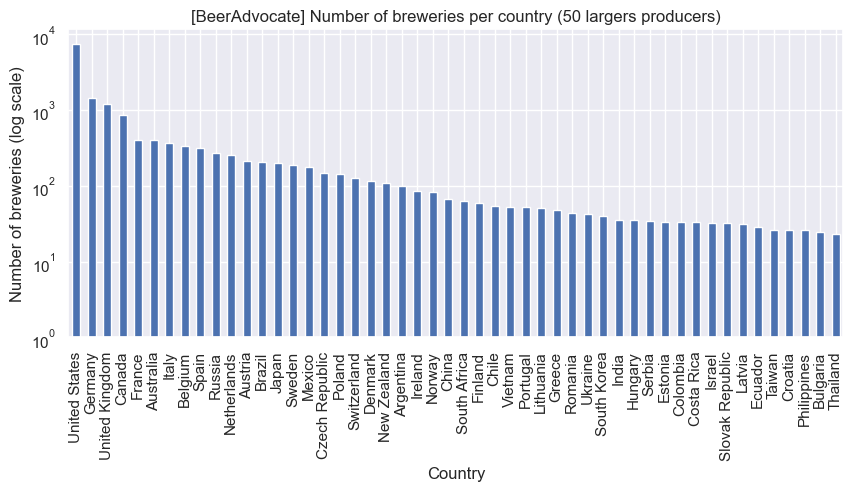

In [12]:
print(f'[BeerAdvocate] Quartiles of the number of breweries per country : {df_ba_breweries["brewery_country"].value_counts().quantile([0.25, 0.5, 0.75]).values}')

df_ba_breweries['brewery_country'].value_counts().head(50).plot(
    kind='bar', 
    log=True,
    figsize=(10, 4),
    title='[BeerAdvocate] Number of breweries per country (50 largers producers)',
    xlabel='Country',
    ylabel='Number of breweries (log scale)',
)

*Observation*: 

We observe that the USA, Germany and the UK are the leader in number of breweries, the only ones with more than $1'000$ breweries. 

However this plot is not really meaningful given that Germany is sligthly above Canada in the list, but the area of Canada is larger than Germany's. 

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

## Users

In [13]:
print(f'[BeerAdvocate] Dataset contains data about {df_ba_users.shape[0]} users')

[BeerAdvocate] Dataset contains data about 153704 users


### Ratings

[BeerAdvocate] Quartiles of the number of ratings per user : [ 1.  3. 16.]


Exception ignored in: Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt
KeyboardInterrupt: 


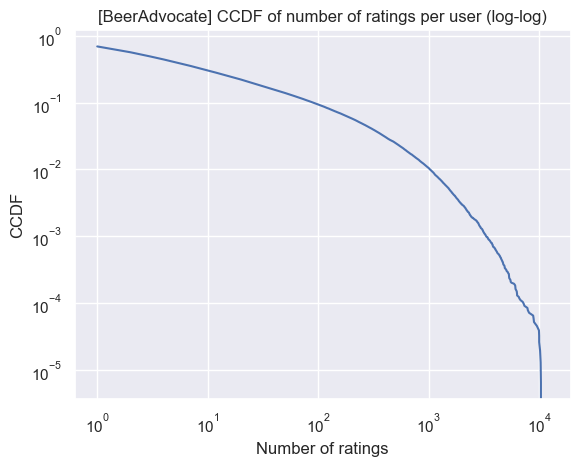

In [14]:
ratings_per_user_CCDF = 1 - df_ba_users['user_ratings_count'].value_counts().sort_index().cumsum() / df_ba_users.shape[0]

ratings_per_user_CCDF.plot(
    x=df_ba_users['user_ratings_count'].value_counts().sort_index(),
    y=ratings_per_user_CCDF,
    logx=True, logy=True, 
    title='[BeerAdvocate] CCDF of number of ratings per user (log-log)',
    xlabel='Number of ratings', 
    ylabel='CCDF',
)

print(f'[BeerAdvocate] Quartiles of the number of ratings per user : {df_ba_users['user_ratings_count'].quantile([0.25, 0.5, 0.75]).values}')

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

*Interpretation*:
 
This graph is important to understand the rating habits of the users. Only $10\%$ of users have more than $100$ ratings. So if we want to draw conclusions we need to focus on individuals that have a large number of ratings, and thus reduce the sample that will be used for the analysis.

### Country

In [10]:
df_ba_users['user_country'].value_counts().head(10)

user_country
United States     113223
Canada              3324
United Kingdom       945
Australia            520
Germany              372
Sweden               308
Netherlands          271
Brazil               267
Belgium              227
Mexico               193
Name: count, dtype: int64

In [11]:
print(f'[BeerAdvocate] Users from United States represent {df_ba_users["user_country"].value_counts(normalize=True).loc['United States'] * 100:.2f}% of accounts')

[BeerAdvocate] Users from United States represent 92.48% of accounts


<Axes: xlabel='user_country'>

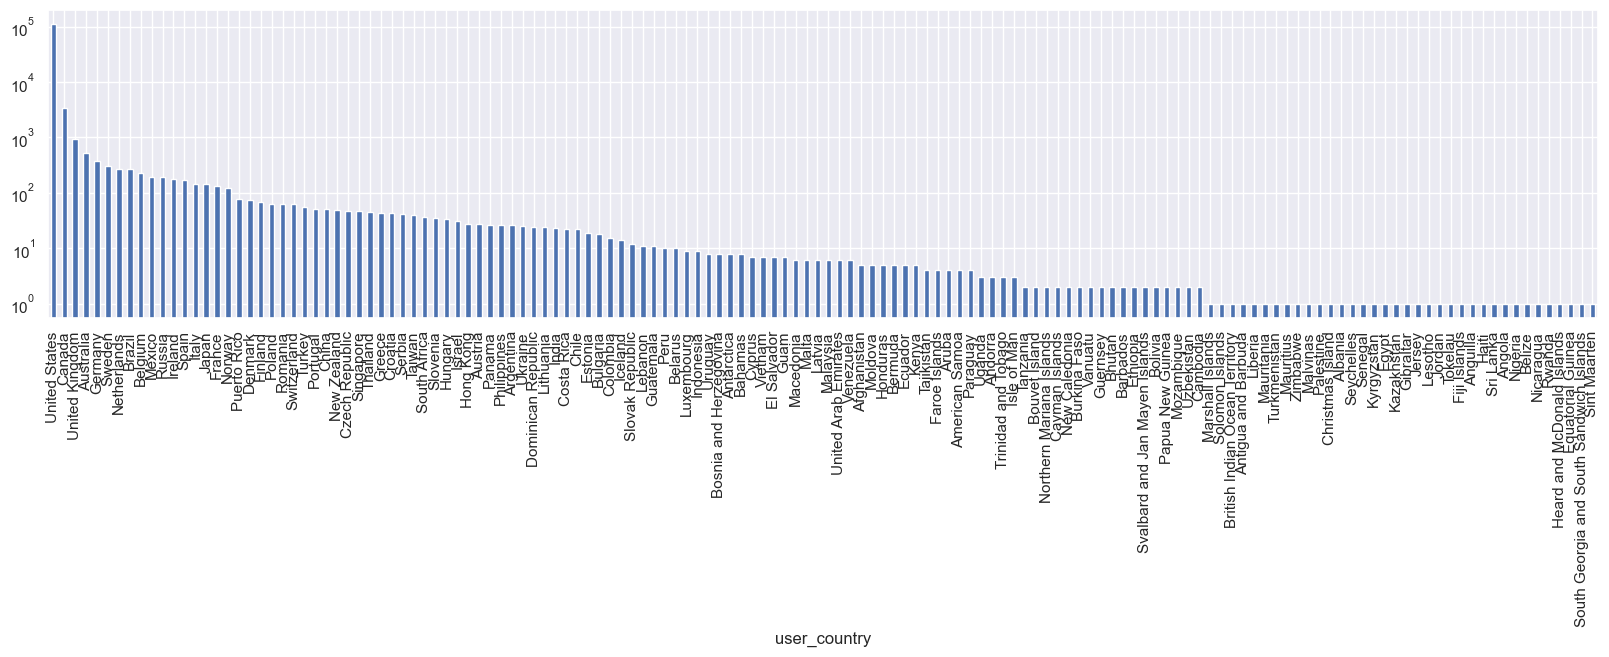

In [12]:
df_ba_users['user_country'].value_counts().plot(
    kind='bar',
    logy=True,
    figsize=(20, 4),
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Creation date

In [13]:
PRESENT_TIME = df_ba_users['user_created_date'].max()
user_years_since_creation = (PRESENT_TIME - df_ba_users['user_created_date']) / 3600 / 24 / 365.25

In [14]:
print(f'[BeerAdvocate] Mean of the number of years since user creation : {user_years_since_creation.mean():.3f}')
print(f'[BeerAdvocate] Quartiles of the number of years since user creation : {user_years_since_creation.quantile([0.25, 0.5, 0.75]).values}')

[BeerAdvocate] Mean of the number of years since user creation : 4.571
[BeerAdvocate] Quartiles of the number of years since user creation : [2.65560119 3.47148072 6.28610541]


<Axes: title={'center': '[BeerAdvocate] Distribution of time elapsed since user account creation (years)'}, xlabel='Years since user creation', ylabel='Number of users'>

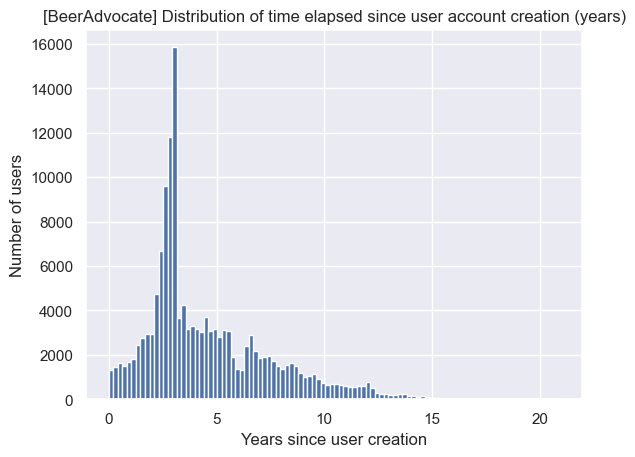

In [15]:
user_years_since_creation.plot(
    kind='hist',
    bins=100,
    title='[BeerAdvocate] Distribution of time elapsed since user account creation (years)',
    xlabel='Years since user creation',
    ylabel='Number of users',
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation (talk about the fact that a lot of accounts could be "dead" accounts that are not active anymore)</span>

*Interpretation*:

First, there was a moderate increase in the number of accounts created between 15 and 7 years ago. Then, from 7 to 6 years ago, there was a sharp decline. Later, there was a huge trend of account creation around 3 years ago. And from 2 years ago to now there has been a decrease.

However, this graph does not tell us if there are dead accounts. 

## Ratings

In [16]:
print(f'[BeerAdvocate] Dataset contains data about {df_ba_ratings.shape[0]} ratings')

[BeerAdvocate] Dataset contains data about 8393032 ratings


### Date

<Axes: title={'center': '[BeerAdvocate] Number of ratings per quarters'}, xlabel='Quarter', ylabel='Number of ratings'>

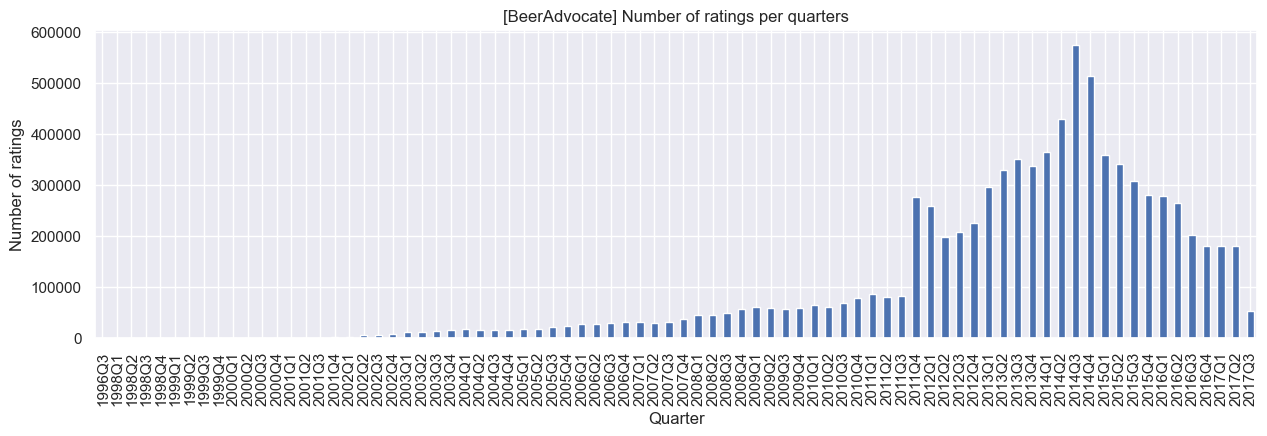

In [17]:
pd.to_datetime(df_ba_ratings['date'], unit='s').dt.to_period('Q').value_counts().sort_index().plot(
    kind='bar',
    figsize=(15, 4),
    title='[BeerAdvocate] Number of ratings per quarters',
    xlabel='Quarter',
    ylabel='Number of ratings'
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Text

In [18]:
print(f'[BeerAdvocate] {(df_ba_ratings['text'].notna()).mean() * 100:.2f}% ({(df_ba_ratings['text'].notna()).sum()}) of the reviews contain a text')

print(f'[BeerAdvocate] Average length of text in reviews : {df_ba_ratings["text"].str.len().mean():.2f} characters')
print(f'[BeerAdvocate] Quartiles of the length of text in reviews : {df_ba_ratings["text"].str.len().quantile([0.25, 0.5, 0.75]).values} characters')

print(f'[BeerAdvocate] Average length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).mean():.2f} words')
print(f'[BeerAdvocate] Quartiles of the length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).quantile([0.25, 0.5, 0.75]).values} words')

[BeerAdvocate] 32.36% (2715709) of the reviews contain a text
[BeerAdvocate] Average length of text in reviews : 648.43 characters
[BeerAdvocate] Quartiles of the length of text in reviews : [377. 561. 816.] characters
[BeerAdvocate] Average length of text in reviews : 113.71 words
[BeerAdvocate] Quartiles of the length of text in reviews : [ 66.  98. 143.] words


Text(0.5, 0, 'Text length')

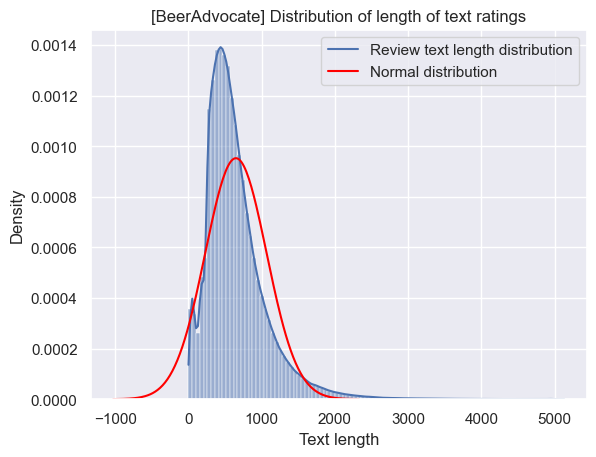

In [19]:
ratings_text_lengths = df_ba_ratings['text'].str.len()

sns.histplot(ratings_text_lengths, bins=100, kde=True, stat="density")


ratings_text_length_mean = ratings_text_lengths.mean()
ratings_text_length_std  = ratings_text_lengths.std()

x = np.linspace(
        ratings_text_length_mean - 4 * ratings_text_length_std,
        ratings_text_length_mean + 4 * ratings_text_length_std, 
        200
    )
y = stats.norm.pdf(x, ratings_text_length_mean, ratings_text_length_std)

sns.lineplot(x=x, y=y, color='red')

plt.title('[BeerAdvocate] Distribution of length of text ratings')
plt.legend(['Review text length distribution', 'Normal distribution'])
plt.xlabel('Text length')

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings (subcategories)

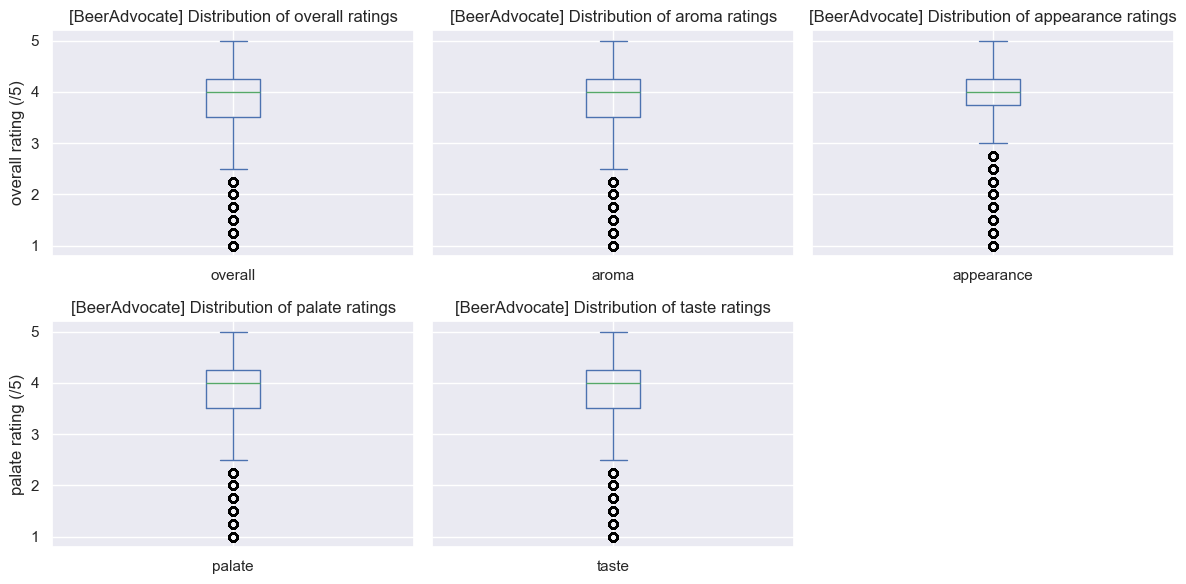

In [20]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(12, 6))
axs = axs.ravel()

for i, c in enumerate(['overall', 'aroma', 'appearance', 'palate', 'taste']):
    df_ba_ratings[c].plot(
        kind='box',
        ax=axs[i],
        title=f'[BeerAdvocate] Distribution of {c} ratings',
        ylabel=f'{c} rating (/5)'
    )

fig.delaxes(axs[-1])
plt.tight_layout()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>